# Vsini tutorial

In [1]:
import sys
import matplotlib.pyplot as plt
%matplotlib inline
import hpfspec
import numpy as np
from hpfspec import utils, spec_help
utils
#sys.path.pop(0)

<module 'hpfspec.utils' from '/home/tehan/PycharmProjects/neidspec/hpfspec/utils.py'>

In [2]:
# Read in three target star spectra
H1 = hpfspec.HPFSpectrum("../hpfspec/data/hpf/spectra/G_9-40/Slope-20190301T024821_R01.optimal.fits",ccf_redshift=True)
H2 = hpfspec.HPFSpectrum("../hpfspec/data/hpf/spectra/GJ_699/Slope-20181003T014556_R01.optimal.fits",ccf_redshift=True)
H3 = hpfspec.HPFSpectrum("../hpfspec/data/hpf/spectra/G_227-22/Slope-20180919T015627_R01.optimal.fits",ccf_redshift=True)

Text(0, 0.5, 'Normalized Flux')

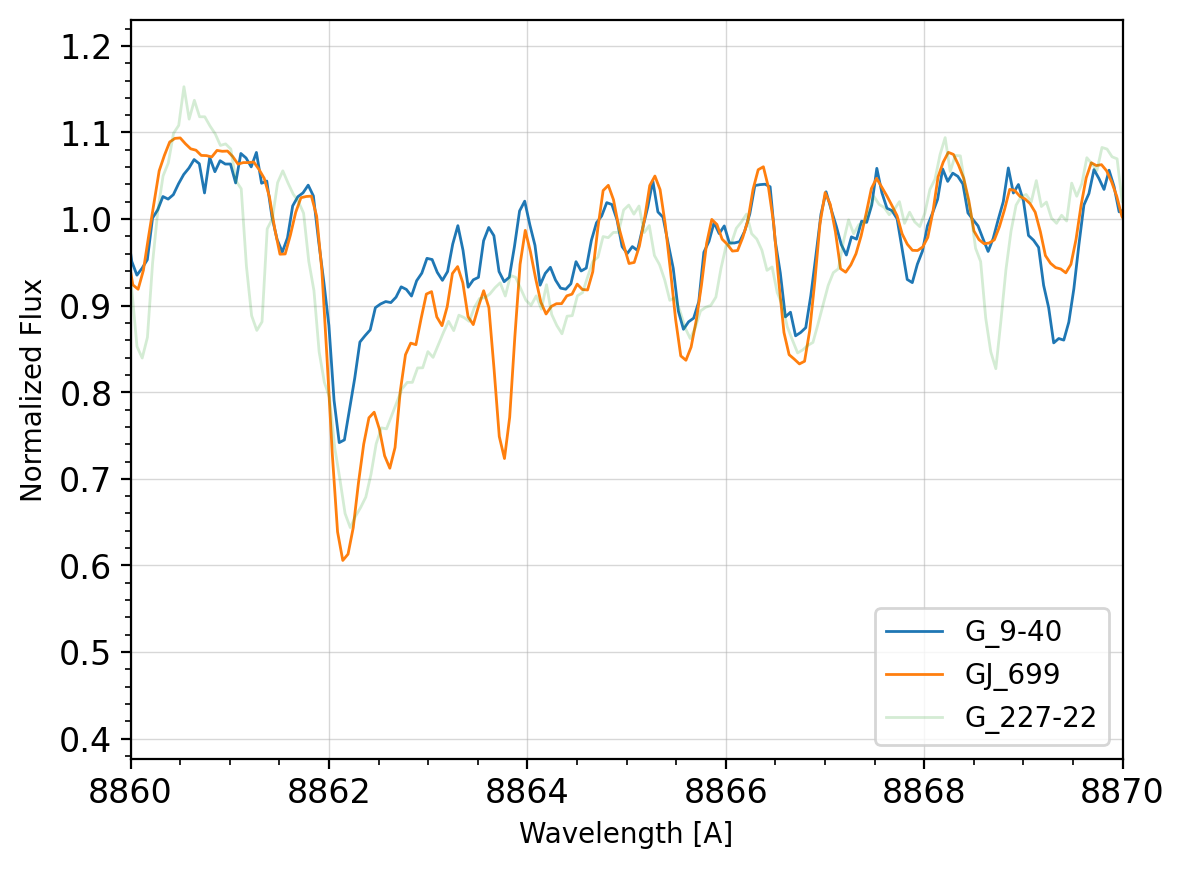

In [3]:
# Lets overplot both of them and see that they line up
# Lets take a look at the TiO bandhead at ~8860A
# G 227-22 is definitely broader
# G 9-40 is shallower in the TiO band (earlier spectral type)
fig, ax = plt.subplots(dpi=200)
o = 6
ax.plot(H1.w_shifted[o],H1.f_debl[o],lw=1,label=H1.object)
ax.plot(H2.w_shifted[o],H2.f_debl[o],lw=1,label=H2.object)
ax.plot(H3.w_shifted[o],H3.f_debl[o],lw=1,alpha=0.2,label=H3.object)
utils.ax_apply_settings(ax)
ax.legend(loc='lower right')
ax.set_xlim(8860,8870)
ax.set_xlabel('Wavelength [A]')
ax.set_ylabel('Normalized Flux')

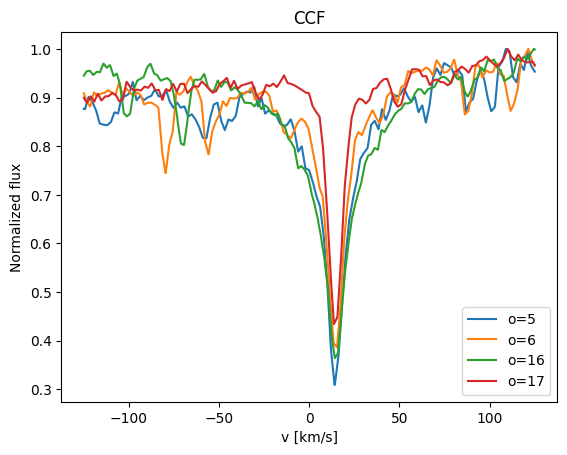

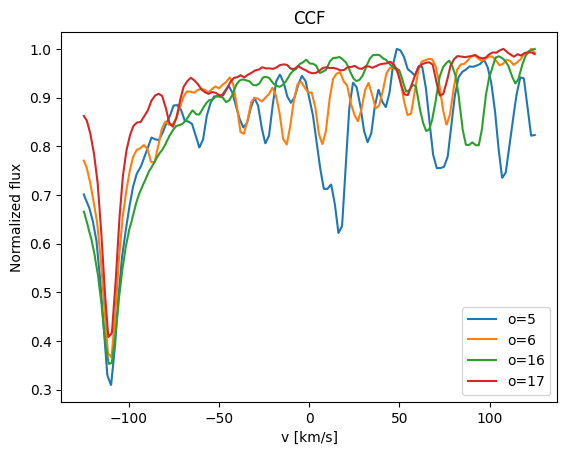

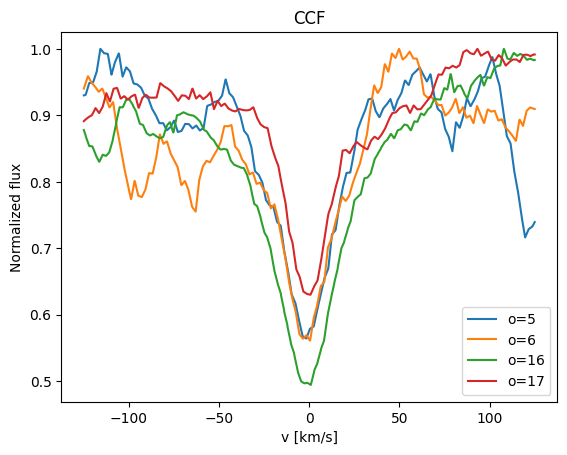

In [4]:
# Lets take a look at CCFs
v = np.linspace(-125.,125.,1501)
orders = [5,6,16,17]
CCF1 = H1.calculate_ccf_for_orders(v,orders=orders,plot=True)
CCF2 = H2.calculate_ccf_for_orders(v,orders=orders,plot=True)
CCF3 = H3.calculate_ccf_for_orders(v,orders=orders,plot=True)

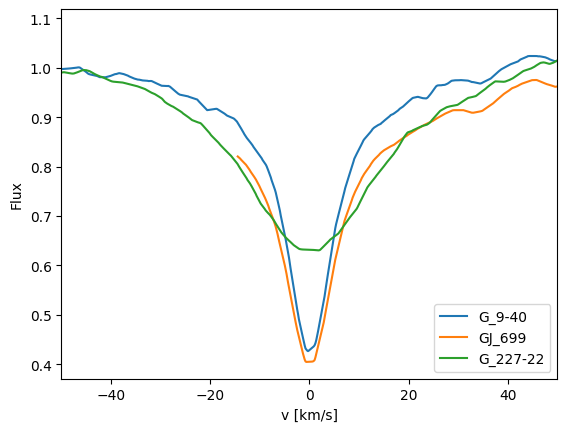

In [5]:
# Lets line all of them up
fig, ax = plt.subplots(dpi=100)
ax.plot(v-H1.rv,CCF1[28]/np.median(CCF1[28]),label=H1.object)
ax.plot(v-H2.rv,CCF2[28]/np.median(CCF2[28]),label=H2.object)
ax.plot(v-H3.rv,CCF3[28]/np.median(CCF3[28]),label=H3.object)
ax.set_xlim(-50,50)
ax.set_xlabel('v [km/s]')
ax.set_ylabel('Flux')
ax.legend(loc='lower right')

# Calculating Vsinis by comparing CCF widths 

In [6]:
# Lets calculate CCFs by comparing CCF widths.
# Note this assumes that your reference star and target star are similar spectral types.
# This further assumes that the reference star is a slow (0-2km/s) rotator, such that the vsini broadening is not 
# seen with the HPF resolution

2.472570109750776 8.992792231083921 [2.56372819]
o=4, vsini= 2.5537376329180583km/s
2.872354206045826 13.422702485405848 [2.71376683]
A value (2.7137668298098854) in x_new is below the interpolation range's minimum value (2.872354206045826).
Setting v1=0
o=5, vsini= 0.0km/s
2.839959570407526 10.218159700606073 [2.8133435]
A value (2.813343496636302) in x_new is below the interpolation range's minimum value (2.839959570407526).
Setting v1=0
o=6, vsini= 0.0km/s
3.017946001334212 10.44881528123587 [2.92500979]
A value (2.9250097870701386) in x_new is below the interpolation range's minimum value (3.017946001334212).
Setting v1=0
o=14, vsini= 0.0km/s
3.097370201648157 11.401930644431323 [2.92127553]
A value (2.9212755311990963) in x_new is below the interpolation range's minimum value (3.097370201648157).
Setting v1=0
o=15, vsini= 0.0km/s
2.988860406706393 9.609356619149908 [2.9382116]
A value (2.9382116018883133) in x_new is below the interpolation range's minimum value (2.988860406706393

(0.0, 0.8936220196560253)

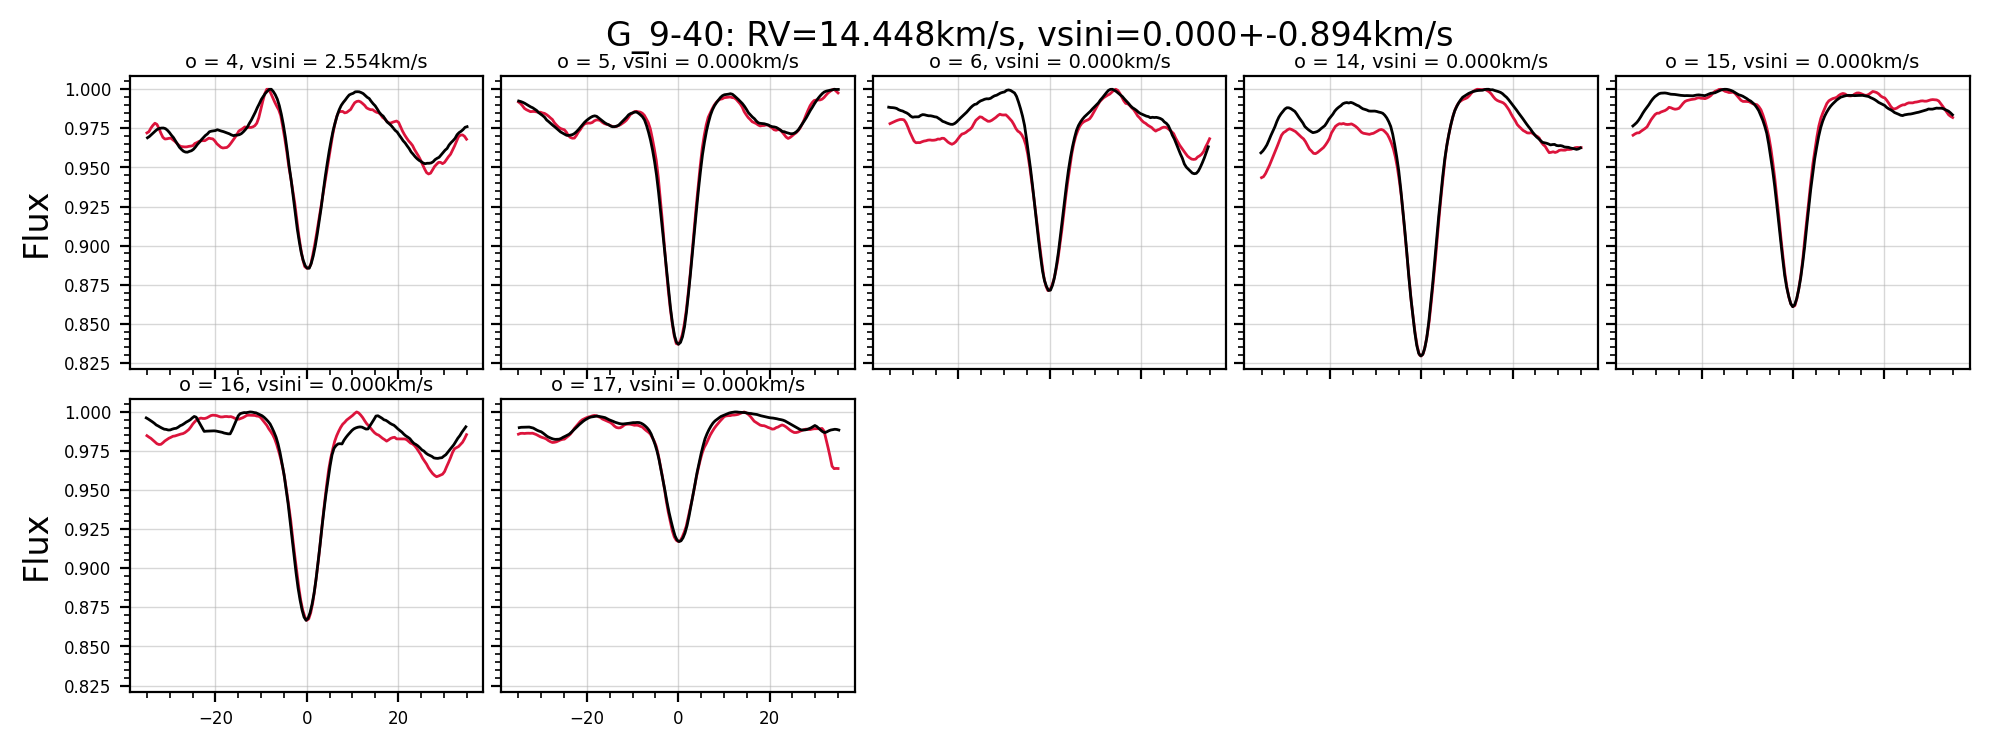

In [7]:
# Slow rotator G 9-40
ftarg = "../hpfspec/data/hpf/spectra/G_9-40/Slope-20190301T024821_R01.optimal.fits"
fcal = "../hpfspec/data/hpf/spectra/GJ_699/Slope-20181003T014556_R01.optimal.fits"
spec_help.vsini_from_hpf_spectra(ftarg,fcal,plot=True)

2.472570109750776 8.992792231083921 [5.73738499]
o=4, vsini= 15.043448001794935km/s
2.872354206045826 13.422702485405848 [8.38707345]
o=5, vsini= 15.88469304785364km/s
3.017946001334212 10.44881528123587 [6.98882901]
o=14, vsini= 14.86409162061991km/s
3.097370201648157 11.401930644431323 [7.6548837]
o=15, vsini= 15.129518573265317km/s
2.988860406706393 9.609356619149908 [7.67627471]
o=16, vsini= 15.866690260585225km/s
3.0429597097025205 11.534683140832877 [8.16614968]
o=17, vsini= 16.191000078609253km/s
out_vsini/ already exists.
Saved to out_vsini/G_227-22_vsini.png


(15.49810441692527, 0.5016534057625632)

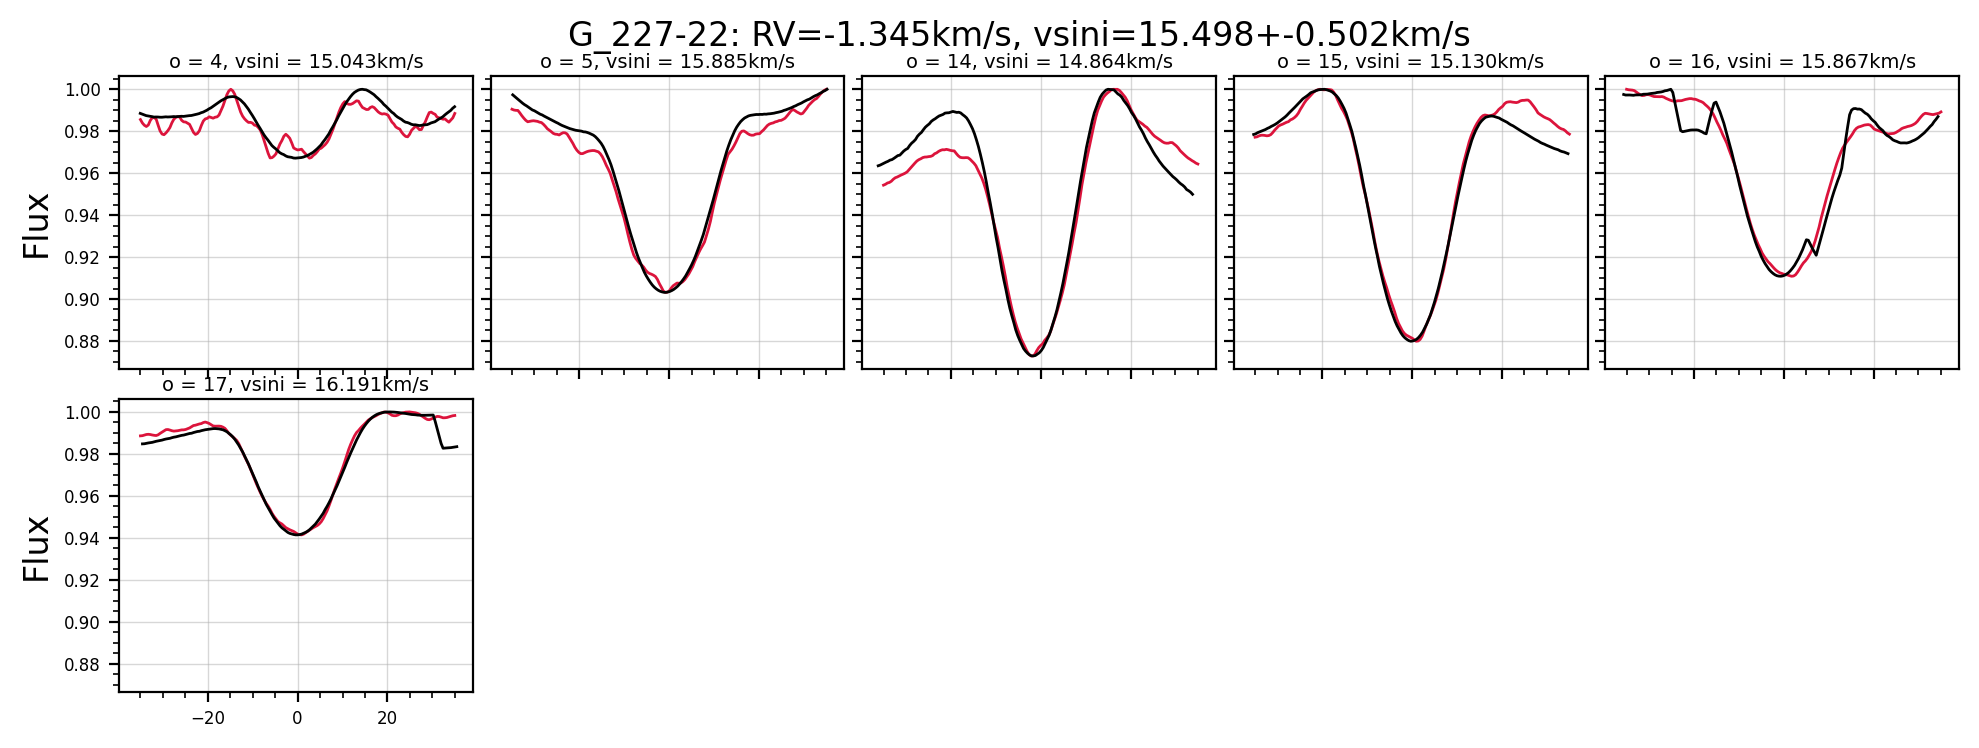

In [8]:
# Fast rotator: G 227-22
ftarg = "../hpfspec/data/hpf/spectra/G_227-22/Slope-20180919T015627_R01.optimal.fits"
fcal  = "../hpfspec/data/hpf/spectra/GJ_699/Slope-20181003T014556_R01.optimal.fits"
spec_help.vsini_from_hpf_spectra(ftarg,fcal,plot=True,orders=[4, 5, 14, 15, 16, 17])